In [1]:

import msgpack
# import easyocr
import imagehash
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

In [2]:
card_hashes = pd.read_pickle('card_hashes.pickle')
card_hashes.head()

,id,perceptual,difference,wavelet
0,hgss4-1,9e6ec9996466b0b1,71694d654c586169,1938000006ffffff
1,xy5-1,bf1e85f0487ad06c,7c667551331d4d67,bf1700008187f7ff
2,pl1-1,da5ac1a51c1f95e4,71195d79675c5769,38800000b7effffd
3,dp3-1,9e5be1e1c48c87a5,317969716d5d176d,980800189f87ffff
4,det1-1,bb1bc0c4e43d3d91,15495979db4f5747,c5000000ff47ffff


In [3]:
card_hashes['perceptual'][0] - perceptual_hash

NameError: name 'perceptual_hash' is not defined

In [ ]:

data_source = 'cards.msgpack'
with open(data_source, 'rb') as file:
    data = msgpack.load(file, raw=False)

In [ ]:
def get_image_route(card_id: str):
    return card_id + '.png'

In [ ]:
def get_hashes(img):
    perceptual = imagehash.phash(img)
    difference = imagehash.dhash(img)
    wavelet = imagehash.whash(img)
    return (perceptual, difference, wavelet)

In [ ]:
def most_similar_hash(img_hash, type='perceptual'):
    min_dif = min(code - img_hash for code in card_hashes[type])
    min_hash = [h for h in card_hashes[type] if h - img_hash == min_dif][0]
    return min_hash




Chimchar {'averageSellPrice': 0.19, 'lowPrice': 0.02, 'trendPrice': 0.14}


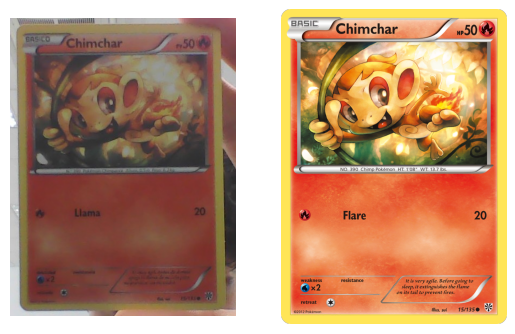

In [ ]:
my_card_src = 'chimchar.jpg'
my_card_img = Image.open(my_card_src)
perceptual_hash, difference_hash, wavelet_hash = get_hashes(my_card_img)

similar = most_similar_hash(perceptual_hash)
similar_id = card_hashes[card_hashes['perceptual'] == similar].reset_index()['id'][0]

similar_card = [card for card in data if card['id'] == similar_id][0]

print(similar_card['name'], similar_card['cardmarket']['prices'])

similar_card_img = Image.open(os.path.join('downloaded_images', get_image_route(similar_id)))


fig, ax = plt.subplots(1, 2)

ax[0].imshow(my_card_img)
ax[1].imshow(similar_card_img)

ax[0].axis('off')
ax[1].axis('off')

plt.show()